# 1. File upload

In [ ]:
from google.colab import files

In [4]:
files.upload()

Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.jpeg to obama_01.jpeg
Saving obama_02.jpeg to obama_02.jpeg
Saving obama_03.jpg to obama_03.jpg
Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel


In [5]:
!ls -al

total 10676
drwxr-xr-x 1 root root     4096 Jan  7 04:24 .
drwxr-xr-x 1 root root     4096 Jan  7 04:21 ..
drwxr-xr-x 4 root root     4096 Dec 23 14:32 .config
-rw-r--r-- 1 root root    28092 Jan  7 04:24 deploy.prototxt.txt
-rw-r--r-- 1 root root     9532 Jan  7 04:24 obama_01.jpeg
-rw-r--r-- 1 root root     5172 Jan  7 04:24 obama_02.jpeg
-rw-r--r-- 1 root root   194499 Jan  7 04:24 obama_03.jpg
-rw-r--r-- 1 root root 10666211 Jan  7 04:25 res10_300x300_ssd_iter_140000.caffemodel
drwxr-xr-x 1 root root     4096 Dec 23 14:32 sample_data


# 2. Load file

In [6]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [20]:
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'
file_name = 'obama_02.jpeg'

In [21]:
min_confidence = 0.3 # 30 % 이상만 얼굴로 인식.
# 학습시 사용한 이미지의 크기 300 by 300
frame_width = 300
frame_height = 300

In [22]:
frame= cv2.imread(file_name) 
height, width = frame.shape[:2]
print(height, width)

178 283


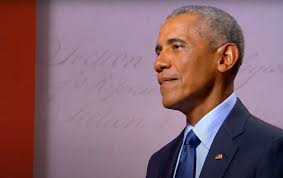

In [23]:
cv2_imshow(frame)

# 3. DNN model

In [24]:
model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

In [25]:
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (frame_width, frame_height)),1.0, (frame_width, frame_height), (104.0, 177.0, 123.0) )

In [26]:
model.setInput(blob)
detections = model.forward()
print(detections)

[[[[0.         1.         0.97053355 ... 0.08084378 0.76460886
    0.5792259 ]
   [0.         1.         0.12442379 ... 4.0106487  4.842023
    4.986066  ]
   [0.         1.         0.12279323 ... 3.997507   0.8401126
    4.9882755 ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


0.97053355 150 14 216 103


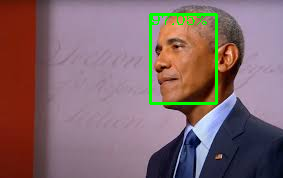

In [27]:
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e. probability)
    confidence = detections[0,0,i,2]
    if confidence > min_confidence:
        box = detections[0,0,i,3:7] * np.array([width, height, width, height])
        startX, startY, endX, endY = box.astype('int')
        print(confidence, startX, startY, endX, endY)
        text = f'{confidence*100:.2f}%'
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX, startY), (endX, endY), (0,255,0), 2)
        cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 1)
# show the output
cv2_imshow(frame)